# Evaluación Continua 9

### Indicaciones

Para esta EC cuenta con dos bases de datos, una de clientes y otra de compras. 

La base de datos de clientes tiene la siguiente estructura:
- `id_cliente`: identificador único del cliente.
- `nombre`: nombre del cliente.
- `direccion`: dirección del cliente.
- `email`: correo electrónico del cliente.
- `edad`: edad del cliente.
- `fecha_registro`: fecha en la que el cliente se registró.
- `activo`: indica si el cliente está activo o no.

La base de datos de compras tiene la siguiente estructura:
- `id_compra`: identificador único de la compra.
- `id_cliente`: identificador único del cliente que realizó la compra.
- `producto`: producto comprado.
- `cantidad`: cantidad de productos comprados.
- `precio`: precio del producto.
- `fecha_compra`: fecha en la que se realizó la compra.

Usted hará EDA (Exploratory Data Analysis) de ambas bases de datos a través del uso de `matplotlib`, `seaborn` y `plotly`.

In [1]:
%pip install pandas matplotlib seaborn plotly plotly.express nbformat  --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os 
#os.chdir(f"D://UTEC//Ciclo 1//Programación 101//Evaluación Continua 11")
clientes = pd.read_csv('clientes_limpio.csv')
compras = pd.read_csv('compras_limpio.csv')

## `matplotlib`

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

### 1.1. Crear un histograma que muestre la distribución de las edades de los clientes.

Text(0, 0.5, 'Número de Clientes')

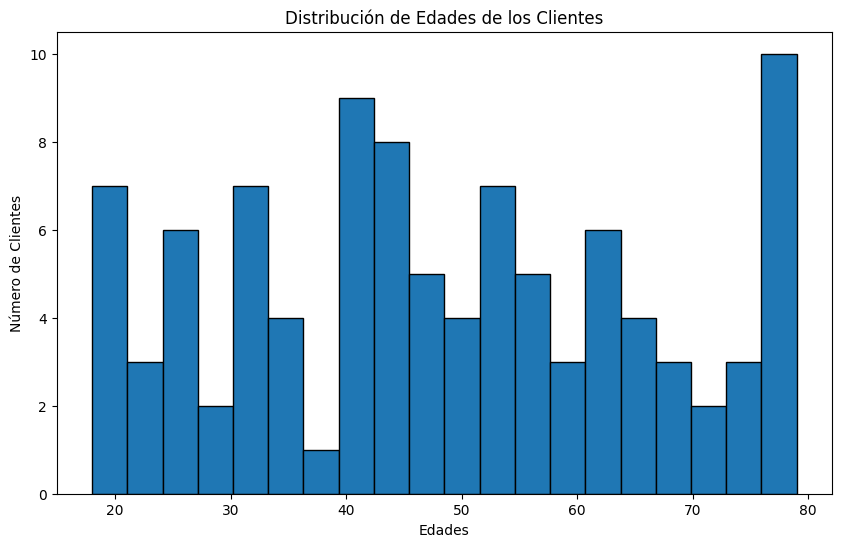

In [4]:
edades = clientes['edad']

plt.figure(figsize=(10, 6))
plt.hist(edades, bins=20, edgecolor='black')
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edades')
plt.ylabel('Número de Clientes')


### 1.2 Crear un gráfico de barras que muestre el número de compras realizadas en cada mes del año 2023.

/var/folders/64/m87yf3yx7zngv12wrzgqgj_w0000gn/T/ipykernel_69347/1594241928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras_2023['mes'] = compras_2023['fecha_compra'].dt.month


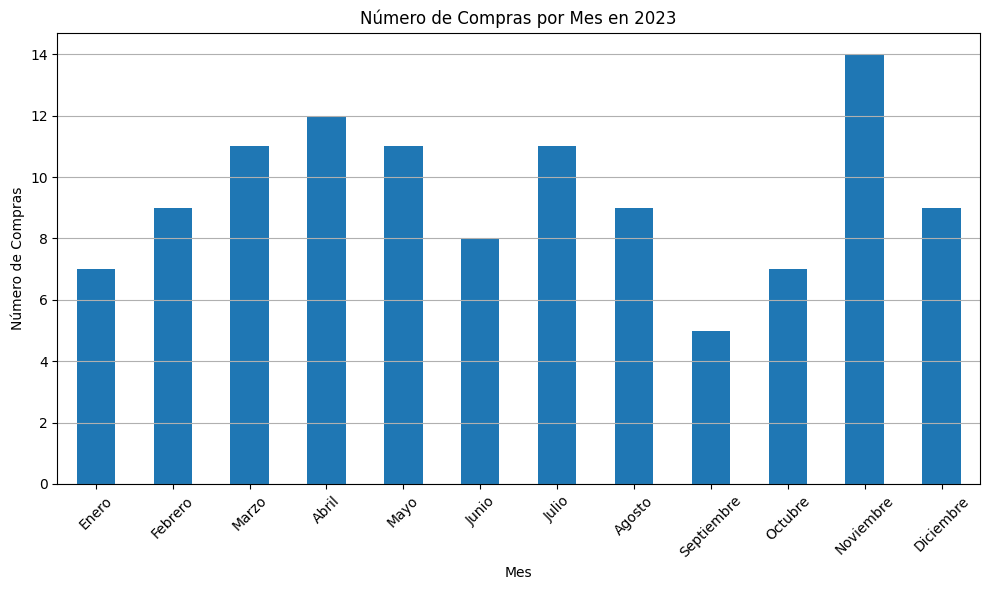

In [5]:
compras['fecha_compra'] = pd.to_datetime(compras['fecha_compra'])
compras_2023 = compras[compras['fecha_compra'].dt.year == 2023]
compras_2023['mes'] = compras_2023['fecha_compra'].dt.month
compras_por_mes = compras_2023['mes'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
compras_por_mes.plot(kind='bar')
plt.title('Número de Compras por Mes en 2023')
plt.xlabel('Mes')
plt.ylabel('Número de Compras')
plt.xticks(range(12), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## `seaborn`

In [6]:
import seaborn as sns

### 2.1 Crear un boxplot que muestre la distribución de los precios para cada producto.

[Text(0, 0, 'gorra'),
 Text(1, 0, 'zapatos'),
 Text(2, 0, 'calcetines'),
 Text(3, 0, 'short'),
 Text(4, 0, 'lentes'),
 Text(5, 0, 'camisa'),
 Text(6, 0, 'corbata'),
 Text(7, 0, 'reloj'),
 Text(8, 0, 'pantalon'),
 Text(9, 0, 'Producto desconocido'),
 Text(10, 0, 'playera')]

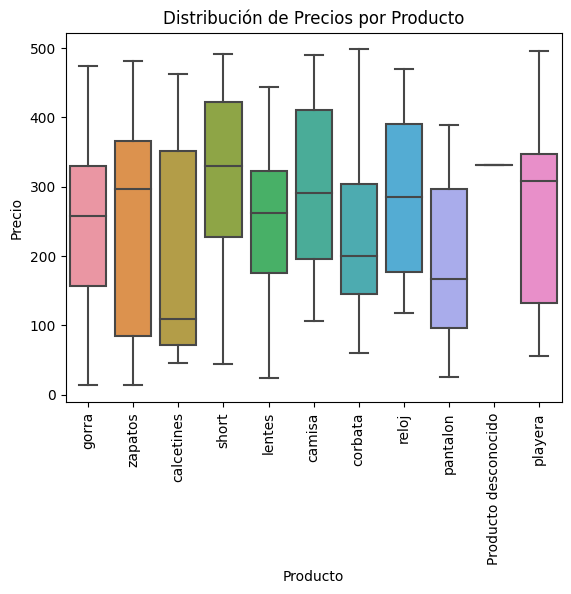

In [49]:
boxplot = sns.boxplot(x='producto', y='precio', data=compras)
boxplot.set(title='Distribución de Precios por Producto', xlabel='Producto', ylabel='Precio')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)

### 2.2 Crear un regplot que muestre la relación entre la edad de los clientes y su gasto total.

¿Crees que se puede establecer una relación entre la edad de los clientes y su gasto total? ¿Por qué?

<Axes: xlabel='edad', ylabel='gasto_total'>

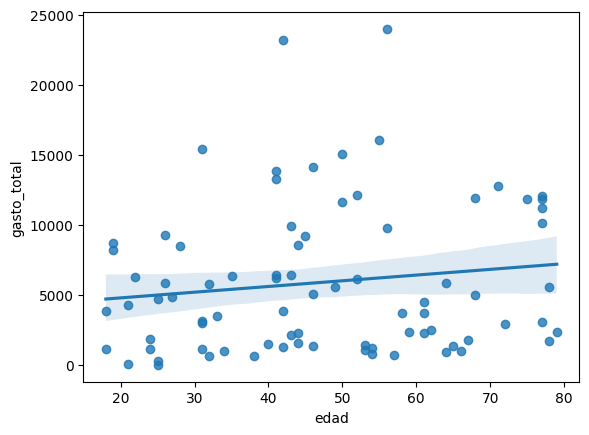

In [7]:
clientes_compras_df = clientes.merge(compras, how="inner", on="id_cliente")
clientes_compras_df["gasto_total"] = clientes_compras_df["cantidad"] * clientes_compras_df["precio"]
gastos_cliente_df = clientes_compras_df.groupby(["id_cliente","edad"])["gasto_total"].sum().reset_index()
sns.regplot(x="edad", y="gasto_total", data=gastos_cliente_df)

Determinando el Coeficiente de determinacion (R^2) para ver si existe una relación fuerte o débil entre la edad y el gasto total

In [8]:
# instalando sckit learn
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = gastos_cliente_df[["edad"]]
y = gastos_cliente_df[["gasto_total"]]

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación (R^2): {round(r2,3)}")

Coeficiente de determinación (R^2): 0.019


CONCLUSIÓN: La línea de regresión parece tener una pendiente ligeramente positiva, sugiriendo una relación positiva débil entre la edad y el gasto total.

## `plotly`

In [10]:
import plotly.express as px

### 3.1 Crear un gráfico de barras interactivo que muestre el top 20 clientes con más compras.

In [11]:
compras_por_cliente = compras.merge(clientes, how='inner', on='id_cliente')
agg_dict = {
'cantidad': 'sum',
'precio': 'sum'
}
top_20 = compras_por_cliente.groupby('id_cliente').agg(agg_dict).reset_index(drop=False)
top_20.columns = ['id_cliente', 'n_compras', 'costo']
top_20 = top_20.sort_values(by='n_compras', ascending=False)
top_20_complete = top_20.merge(clientes, how='left', on='id_cliente')
top_20_complete = top_20_complete[:20]

px.bar(top_20_complete, x='nombre', y ='n_compras', color='costo', 
labels={'n_compras':'Cantidad de compras', 'nombre': 'Nombre', 'costo': 'Gasto total'}, 
title='Top 20 usuarios con mas compras', height=400)

### 3.2 Crear un gráfico de líneas que muestre el número de compras realizadas cada mes a lo largo del tiempo.



In [12]:
compras_por_cliente['mes'] = compras_por_cliente['fecha_compra']
agg_dict = {
'cantidad': 'sum',
}
historico_mes = compras_por_cliente.groupby('mes').agg(agg_dict).reset_index(drop=False)
historico_mes.columns = ['mes', 'n_compras']
historico_mes.sort_values(by='mes', ascending=True)
px.line(historico_mes, x="mes", y="n_compras", 
labels={'n_compras':'Cantidad de compras', 'mes': 'Mes'}, 
title='Cantidad de compras por mes', height=400)